# Testing ECDF implementations

## Initial test with ECDF

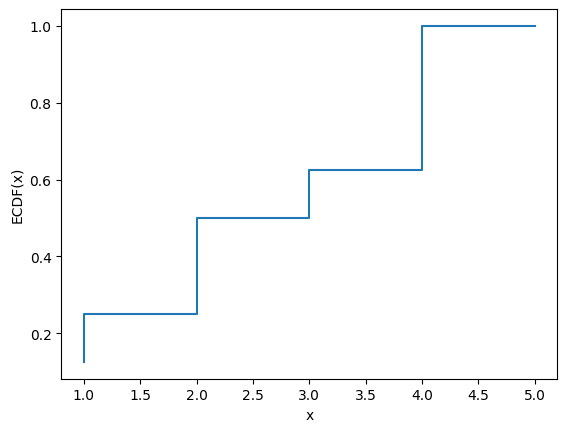

[1 2 2 3 4 4 4 5] [0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.   ]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data
data = [1, 2, 2, 3, 4, 4, 4, 5]

# Calculate the ECDF
def ECDF(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)

    # Plot the ECDF using matplotlib
    plt.step(x, y)
    plt.xlabel('x')
    plt.ylabel('ECDF(x)')
    plt.show()

    return x,y

x,y = ECDF(data=data)
print(x,y)



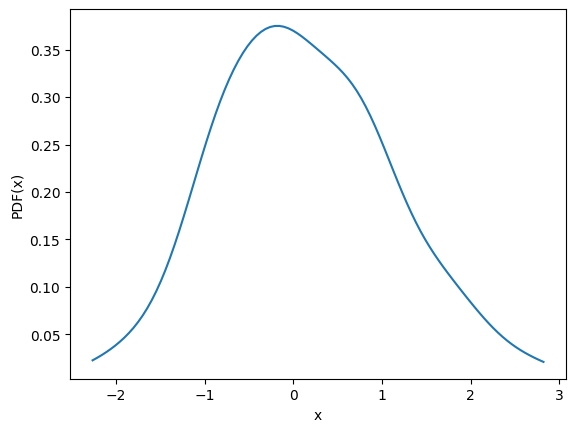

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Generate some example data
data = np.random.normal(loc=0, scale=1, size=100)

# Estimate the PDF using gaussian_kde
pdf = gaussian_kde(data)

# Evaluate the PDF at a range of x values
x = np.linspace(min(data), max(data), 100)
y = pdf(x)

# Plot the PDF using matplotlib
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('PDF(x)')
plt.show()


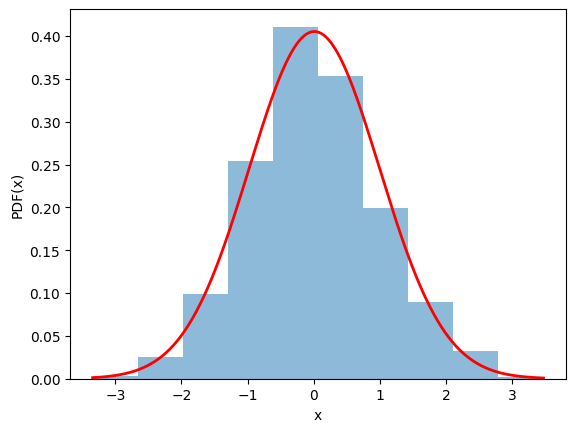

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
size = 10

# Generate some example data
data = np.random.normal(loc=0, scale=1, size=1000)
#data = np.random.exponential(scale=2, size=1000)


# Calculate the histogram using numpy.histogram
hist, bins = np.histogram(data, bins=10, density=True)

# Find the best-fit parameters for a normal distribution using scipy.stats.norm.fit
mu, sigma = norm.fit(data)

# Generate the normal distribution curve using scipy.stats.norm.pdf
x = np.linspace(min(data), max(data), 1000)
pdf = norm.pdf(x, mu, sigma)

# Plot the histogram and the normal distribution curve using matplotlib
plt.hist(data, bins=10, density=True, alpha=0.5)
plt.plot(x, pdf, 'r-', lw=2)
plt.xlabel('x')
plt.ylabel('PDF(x)')
plt.show()


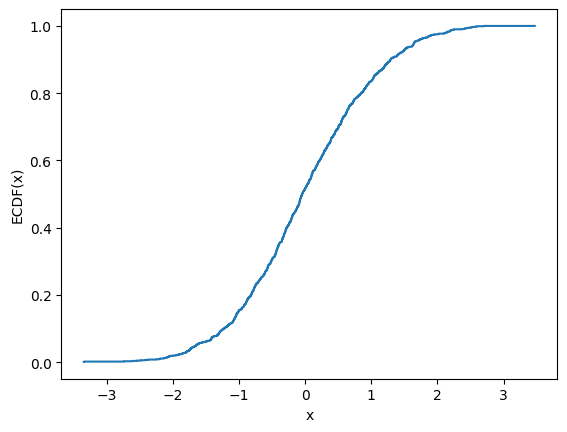

(array([-3.34348803e+00, -2.73761362e+00, -2.61286675e+00, -2.54156957e+00,
        -2.48097226e+00, -2.41246189e+00, -2.37090326e+00, -2.24578170e+00,
        -2.19775559e+00, -2.19297770e+00, -2.13692879e+00, -2.12539214e+00,
        -2.09063184e+00, -2.08929737e+00, -2.07525912e+00, -2.05822570e+00,
        -2.05141319e+00, -2.03743710e+00, -1.99919618e+00, -1.95365430e+00,
        -1.93791953e+00, -1.91232696e+00, -1.90089427e+00, -1.86612311e+00,
        -1.85733572e+00, -1.84576570e+00, -1.83552780e+00, -1.80602565e+00,
        -1.80059115e+00, -1.79042870e+00, -1.78923088e+00, -1.78670909e+00,
        -1.76606584e+00, -1.75478021e+00, -1.74692773e+00, -1.74420543e+00,
        -1.74037896e+00, -1.73805731e+00, -1.73494009e+00, -1.72553825e+00,
        -1.71938356e+00, -1.71542607e+00, -1.70417818e+00, -1.70184842e+00,
        -1.68572864e+00, -1.68210138e+00, -1.65855407e+00, -1.65094692e+00,
        -1.65008812e+00, -1.65004507e+00, -1.64482691e+00, -1.63607444e+00,
        -1.6

In [31]:
ECDF(data=data)

# DTW Function
Imported for testing.

In [213]:
def dDTW(s1,s2):
    m = len(s1)                 # sequence 1 of size m
    n = len(s2)                 # sequence 2 of size n
    s1_bar = np.divide(s1,max(max(s1),max(s2)))
    s2_bar = np.divide(s2,max(max(s1),max(s2)))

    d = np.zeros((n+1,m+1))     # Distance matrix d. It has a size of (n+1)x(m+1).
    d[1:n+1:1,0] = np.inf
    d[0,1:m+1:1] = np.inf
    for i in range(1,n+1):
        for j in range(1,m+1):
            # we take the absolute distance between two points plus the minimum of the three values surronding it.
            d[i,j] = abs(s2_bar[i-1]-s1_bar[j-1])+min(d[i-1,j-1],d[i-1,j],d[i,j-1])
    # we divide the value of last cell with the max(n,m)
    dDTW_bar = d[n,m]/max(n,m)
    # validity index. Closer to 1 means less difference/distance between two sequences. Hence 1 means, the sequence is valid.
    dDTW = 1 - dDTW_bar         

    # print("cumulative distance = ", d[n,m])
    # print("distance matrix =\n",d)
    # print("validity index = ",dDTW)
    return(dDTW)


# Input validation - quasi Trace Driven Simulation (qTDS)

## Description

Description
In trace driven simulation (TDS) the same input data of the real system are fed to the simulator; then, a comparison of the output measures YR and YS is done. On the other hand, if the scope is the validation of the inputs, TDS is not suitable since, in this case, the mechanisms of input data generation are investigated. Hence, input data shall be generated through the same probability model that has been assumed (FS). In this case, comparing YR and YS directly might be a difficult task due to the innate noise of the Random Number Generation that makes YS totally uncorrelated from YR and not useful for any comparison when only a small dataset is available.

QTDS is based on the intuition that with correct assumptions on the inputs, the simulation output data will show a behavior very similar to the real system, allowing for the comparison of YR and YS. On the other hand, assuming a distribution that is not realistic will yield to significantly different outputs. QTDS simply generates random variates XS starting from FS that are highly correlated with the real system input datasets XR. Following are the steps for qTDS:

### Step 1: Calculate eCDF
We calculate emperical cumulative desity function from Xr (real data) with distribution Fr (real unknown distribution).

### Step 2: Calculate inverse transform u
Then inverse transform of the ecdf is used to obtain u which is an array of values ranging between 0 and 1 with the same randomness as the actual data set Xr. Slight deviation are possible due to the randomness generated in the uniform distribution used for generating the value.

To Understand: The cdf F  is a monotonically increasing function, it has an inverse; let us denote this by F<sup>−1</sup>. If F is the cdf of X, then F<sup>−1</sup>(α) is the value of x<sub>α</sub> such that P(X ≤ x<sub>α</sub>) = α.

### Step 3: Generate distribution
Here we are trying to generate data set Xs (digital data) by usingthe distribution parameters available in the digital model. As per qTDS, we use the randomness u along the generation to obtain the data set Xs. This is done by using the inverse CDF function of the respective distribution (with the distribution parameters from digital model and the randomness u).


## qTDS - Individual Tests

Below cells, only for testing.

In [ ]:
# # For testing conditions, we keep stochastic input variables constant.
# # In normal run ignore this cell and make sure the respective codes are activated in the upcoming cells
# # Comment the similar codes in the next cell before testing.
# mu, sigma = 5, 1
# Xr = np.random.normal(mu, sigma, 1000)
# unif = np.random.uniform(0.01, 1, len(Xr))
# # u value below 0.01 gives inf values in mean and dtw. So, for testing conditions. So we take unif between 0.01 and 1
# print(min(unif))

### Functions for eCDF and u generation

In [388]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the ECDF
def ECDF(Xr):
    Xr = np.sort(Xr)
    
    ecdf = np.arange(1, (len(Xr)+1)) / len(Xr) # calculate ecdf
    # print(ecdf)
    # Plot the ECDF using matplotlib
    # plt.plot(Xr, ecdf, color='red')
    # plt.xlabel('Xr')
    # plt.ylabel('ECDF(x)')
    # plt.show()
    # print(Xr)
    # print(ecdf)
    return(ecdf)

# Calculate randomness u
def inv_trans(ecdf):
    size = len(ecdf)
    # print(len(ecdf))
    unif = np.random.uniform(0.01, 1, size)   # u value below 0.01 gives inf values.
    # print(min(u))
    # print(len(unif))
    index = np.searchsorted(ecdf, unif)
    u = index/len(index)
    # print (len(u))
    return(u)

# # test case - uncomment following codes in the cell for testing
# # Generate some example data
# from scipy.stats import norm
# mu, sigma = 5, 1
# Xr = np.random.normal(mu, sigma, 100)
# # Xr=(2,4,6,8,9,2,6,6) # simple data

# Step 1
# ecdf = ECDF(Xr) # calculate emperical cdf
# Step 2
# u = inv_trans(ecdf) # calculate inverse transform of ecdf
# Step 3
# Xs = norm.ppf(u, mu, sigma)    # generate normal distribution based on inverse transform.

# # plotting real and digital data
# i = np.arange(1,len(Xr)+1,1)
# plt.plot(i, Xr, color='blue')
# plt.plot(i, Xs, color='red')
# plt.xlabel('i')
# plt.ylabel('Xr Xs')
# plt.legend(["Xr","Xs"])
# plt.show()

# print(np.mean(Xr),np.std(Xr))
# print(np.mean(Xs),np.std(Xs))
# Dynamic time warping is used for comparing the two sequences.
# Values above 0.85 or 0.9 could be taken as valid.
# print("Validity Index = ",dDTW(Xr,Xs))

### Normal distribution

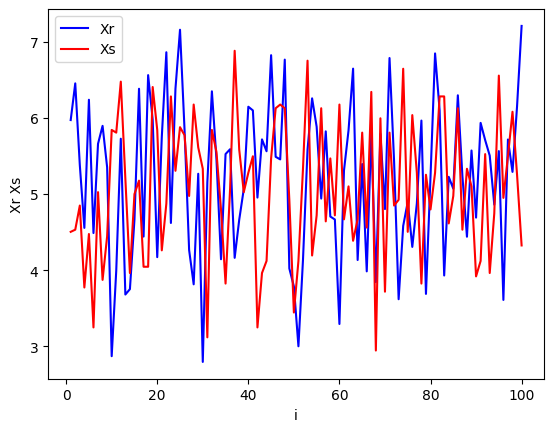

mu_real =  5.200687879424862 sigma_real =  1.0021165099039184
mu_digital =  5.068982765321791 sigma_digital =  0.8929433331289852
Validity Index =  0.9183781027346649


In [389]:
#   Generating real data
#   --------------------------
from scipy.stats import norm
mu, sigma = 5, 1
size = 100
Xr = norm.rvs(loc=mu, scale=sigma, size=size)

#   -----------------------------------------------------------------------------------------
#   Validation procedure
#   --------------------------
u = inv_trans(ECDF(Xr)) # calculate inverse transform of ecdf
Xs = norm.ppf(q=u, loc=mu, scale=sigma)    # generate normal distribution Xs.

#   -----------------------------------------------------------------------------------------
#   Validation results
#   --------------------------
i = np.arange(1,len(Xr)+1,1)
plt.plot(i, Xr, color='blue')
plt.plot(i, Xs, color='red')
plt.xlabel('i')
plt.ylabel('Xr Xs')
plt.legend(["Xr","Xs"])
plt.show()
print("mu_real = ",np.mean(Xr),"sigma_real = ",np.std(Xr))
print("mu_digital = ",np.mean(Xs),"sigma_digital = ",np.std(Xs))

print("Validity Index = ",dDTW(Xr,Xs))

### Exponential Distribution

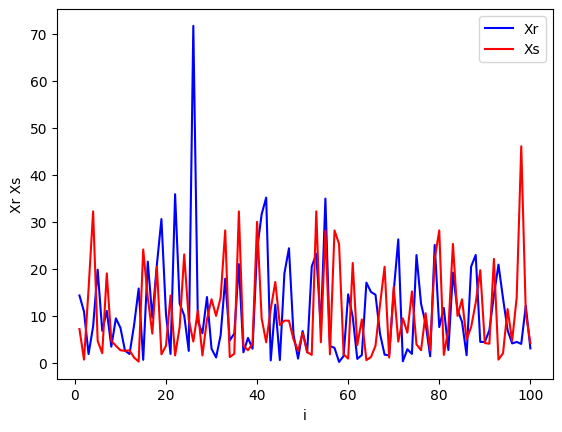

mu_real =  11.07451949580102 sigma_real =  10.767823057687059
mu_digital =  10.188034151278913 sigma_digital =  9.485608321580255
Validity Index =  0.928579515208886


In [383]:
#   Generating real data
#   --------------------------
from scipy.stats import expon
loc, scale = 0, 10
# location, loc = 0 means, distribution has minimum value at 0. This might not be desirable for processing times.
# scale is the control parameter of the exponential slope.
size = 100
Xr = expon.rvs(loc=loc, scale=scale, size=size) #numpy doesnot use threshold value
#   -----------------------------------------------------------------------------------------
#   Validation procedure
#   --------------------------
u = inv_trans(ECDF(Xr)) # calculate inverse transform of ecdf
Xs = expon.ppf(q=u, loc=loc, scale=scale)    # generate normal distribution Xs.

#   -----------------------------------------------------------------------------------------
#   Validation results
#   --------------------------
i = np.arange(1,len(Xr)+1,1)
plt.plot(i, Xr, color='blue')
plt.plot(i, Xs, color='red')
plt.xlabel('i')
plt.ylabel('Xr Xs')
plt.legend(["Xr","Xs"])
plt.show()
print("mu_real = ",np.mean(Xr),"sigma_real = ",np.std(Xr))
print("mu_digital = ",np.mean(Xs),"sigma_digital = ",np.std(Xs))

print("Validity Index = ",dDTW(Xr,Xs))

### Gamma Distribution


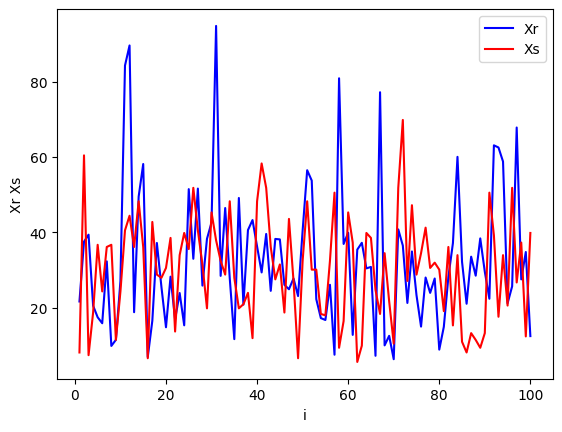

mu_real =  32.74578809610345 sigma_real =  18.355322955178522
mu_digital =  30.281751593997505 sigma_digital =  13.930868561623006
Validity Index =  0.8925382289076562


In [391]:
#   Generating real data
#   --------------------------
from scipy.stats import gamma
a, loc, scale = 3, 0, 10
# a is the shape parameter
# location, loc = 0 means, distribution has minimum value at 0. This might not be desirable for processing times.
# scale is the control parameter of the exponential slope.
size = 100
Xr = gamma.rvs(a=a, loc=loc, scale=scale, size=size) #numpy doesnot use threshold value
#   -----------------------------------------------------------------------------------------
#   Validation procedure
#   --------------------------
u = inv_trans(ECDF(Xr)) # calculate inverse transform of ecdf
Xs = gamma.ppf(q=u, a=a, loc=loc, scale=scale)    # generate normal distribution Xs.

#   -----------------------------------------------------------------------------------------
#   Validation results
#   --------------------------
i = np.arange(1,len(Xr)+1,1)
plt.plot(i, Xr, color='blue')
plt.plot(i, Xs, color='red')
plt.xlabel('i')
plt.ylabel('Xr Xs')
plt.legend(["Xr","Xs"])
plt.show()
print("mu_real = ",np.mean(Xr),"sigma_real = ",np.std(Xr))
print("mu_digital = ",np.mean(Xs),"sigma_digital = ",np.std(Xs))

print("Validity Index = ",dDTW(Xr,Xs))

### Erlang distribution

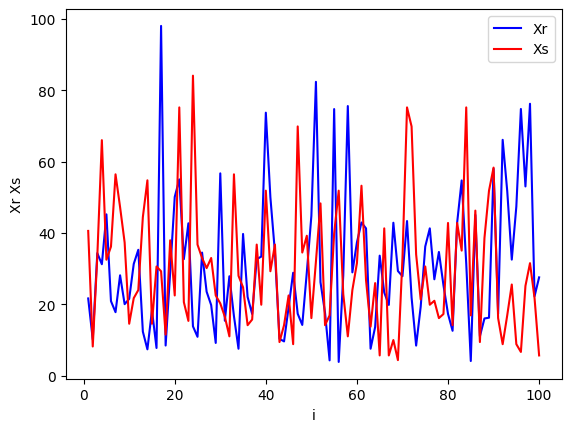

mu_real =  30.8814639563781 sigma_real =  19.321481235295344
mu_digital =  30.05169297069594 sigma_digital =  18.002608885170414
Validity Index =  0.8856802094095888


In [400]:
#   Generating real data
#   --------------------------
from scipy.stats import erlang
a, loc, scale = 3, 0, 10
# a is the shape parameter
# location, loc = 0 means, distribution has minimum value at 0. This might not be desirable for processing times.
# scale is the control parameter of the exponential slope.
size = 100
Xr = erlang.rvs(a=a, loc=loc, scale=scale, size=size) #numpy doesnot use threshold value
#   -----------------------------------------------------------------------------------------
#   Validation procedure
#   --------------------------
u = inv_trans(ECDF(Xr)) # calculate inverse transform of ecdf
Xs = erlang.ppf(q=u, a=a, loc=loc, scale=scale)    # generate normal distribution Xs.

#   -----------------------------------------------------------------------------------------
#   Validation results
#   --------------------------
i = np.arange(1,len(Xr)+1,1)
plt.plot(i, Xr, color='blue')
plt.plot(i, Xs, color='red')
plt.xlabel('i')
plt.ylabel('Xr Xs')
plt.legend(["Xr","Xs"])
plt.show()
print("mu_real = ",np.mean(Xr),"sigma_real = ",np.std(Xr))
print("mu_digital = ",np.mean(Xs),"sigma_digital = ",np.std(Xs))

print("Validity Index = ",dDTW(Xr,Xs))

## qTDS Function simplified & cleaned

### Variables explained

Variables explained:
- if distribution == 'norm':
    N_Parameter=2   # loc = mu, scale = sigma
    
- elif distribution == 'expon':
    N_Parameter=2   # loc = threshold or inital value, scale = scale/slope of exponential curve

- elif distribution == 'gamma':
    N_Parameter=3   # a = shape parameter, loc, scale

- elif distribution == 'erlang':
    N_Parameter=3   # a = shape parameter, loc, scale

- elif distribution == 'weibull_min':
    N_Parameter=3   # a = shape parameter beta or k, loc = gamma, scale = eta(n) or lambda

- elif distribution == 'weibull_max':
    N_Parameter=3   # a = shape parameter beta or k, loc = gamma, scale = eta(n) or lambda

- elif distribution == 'triang':
    N_Parameter=3   # a = shape or mode parameter, loc = minimum or start, scale = maximum or end

- elif distribution == 'lognorm':
    N_Parameter=3   # a threshold, scale = sigma

- elif distribution == 'beta':
    N_Parameter=4   # a,b = shape parameters, loc, scale
    
- else:
    print("Warning: Specified distribution type not found. Executing validation assuming an exponential distribution")
    N_Parameter=2   # loc = threshold or inital value, scale = scale/slope of exponential curve

### Functions

In [413]:
# Main input validation function
def input_validation(a, b, loc, scale, size, distribution,Xr):
    
    # -----------------------------------------------------
    # Main functions
    # -----------------------------------------------------
    import numpy as np
    # Calculate the ECDF
    def ECDF(Xr):
        Xr = np.sort(Xr)
        
        ecdf = np.arange(1, (len(Xr)+1)) / len(Xr) # calculate ecdf
        return(ecdf)
    # Calculate randomness u
    def inv_trans(ecdf):
        size = len(ecdf)
        unif = np.random.uniform(0.01, 1, size)   # u value below 0.01 gives inf values.
        index = np.searchsorted(ecdf, unif)
        u = index/len(index)
        return(u)

    # -----------------------------------------------------
    # Function for Generating dedicated disrtibutions
    # -----------------------------------------------------
    # we mention the number of parameters used to define the distribution as N_Parameter
    if distribution == 'norm':
        from scipy.stats import norm as dist
        N_Parameter=2   # loc = mu, scale = sigma
    elif distribution == 'expon':
        from scipy.stats import expon as dist
        N_Parameter=2   # loc = threshold or inital value, scale = scale/slope of exponential curve
    elif distribution == 'gamma':
        from scipy.stats import gamma as dist
        N_Parameter=3   # a = shape parameter, loc, scale
    elif distribution == 'erlang':
        from scipy.stats import erlang as dist
        N_Parameter=3   # a = shape parameter, loc, scale
    elif distribution == 'weibull_min':
        from scipy.stats import weibull_min as dist
        N_Parameter=3   # a = shape parameter beta or k, loc = gamma, scale = eta(n) or lambda
    elif distribution == 'weibull_max':
        from scipy.stats import weibull_max as dist
        N_Parameter=3   # a = shape parameter beta or k, loc = gamma, scale = eta(n) or lambda
    elif distribution == 'triang':
        from scipy.stats import triang as dist
        N_Parameter=3   # a = shape or mode parameter, loc = minimum or start, scale = maximum or end
    elif distribution == 'lognorm':
        from scipy.stats import lognorm as dist
        N_Parameter=3   # a threshold, scale = sigma
    elif distribution == 'beta':
        from scipy.stats import beta as dist
        N_Parameter=4   # a,b = shape parameters, loc, scale
    else:
        print("Warning: Specified distribution type not found. Executing validation assuming an exponential distribution")
        from scipy.stats import expon as dist
        N_Parameter=2   # loc = threshold or inital value, scale = scale/slope of exponential curve

    if N_Parameter==2:
        # Generating real and digital data
        Xr = dist.rvs(loc, scale, size=size)   # Generating real data Xr.
        u = inv_trans(ECDF(Xr)) # calculate inverse transform of ecdf.
        Xs = dist.ppf(u, loc, scale)    # generate distribution Xs.

    if N_Parameter==3:
        # Generating real and digital data
        Xr = dist.rvs(a, loc, scale, size=size)   # Generating real data Xr.
        u = inv_trans(ECDF(Xr)) # calculate inverse transform of ecdf.
        Xs = dist.ppf(u, a, loc, scale)    # generate distribution Xs.

    if N_Parameter==4:
        # Generating real and digital data
        Xr = dist.rvs(a, b, loc, scale, size=size)   # Generating real data Xr.
        u = inv_trans(ECDF(Xr)) # calculate inverse transform of ecdf.
        Xs = dist.ppf(u, a, b, loc, scale)    # generate distribution Xs.

    # -----------------------------------------------------
    # Generation results and Validity index
    # -----------------------------------------------------
    # Generation results - can be commented if not required.
    # i = np.arange(1,len(Xr)+1,1)
    # plt.plot(i, Xr, color='blue')
    # plt.plot(i, Xs, color='red')
    # plt.xlabel('i')
    # plt.ylabel('Xr Xs')
    # plt.legend(["Xr","Xs"])
    # plt.show()
    # print("mu_real = ",np.mean(Xr),"sigma_real = ",np.std(Xr))
    # print("mu_digital = ",np.mean(Xs),"sigma_digital = ",np.std(Xs))
    Validity_Index = dDTW(Xr,Xs)    # DTW for sequence comparison and vaildity inspection - final output
    # print("Validity Index = ",Validity_Index)

    return(Xs,Validity_Index)


# parameters inside the digital model
loc, scale = 5, 1   # use only generalised parameters (a, b, loc, scale)
size = 100
distribution = 'norm' # we define the required distribution here as a string

Xs, validity = input_validation(0,0,loc,scale,size,distribution,0)
print("Xs = ",Xs,"\n","\n","Validity Index = ",validity)

Xs =  [5.99445788 4.38718701 5.         4.84903078 5.58284151 4.50414965
 4.04583475 4.92473014 5.10043372 4.5323012  3.71844843 4.04583475
 4.41715849 4.87433865 5.99445788 7.05374891 6.28155157 6.28155157
 5.67448975 4.00554212 4.32551025 5.55338472 3.91968066 2.94625109
 4.77245502 6.64485363 4.64154121 5.43991317 4.41715849 6.03643339
 5.77219321 5.27931903 5.80642125 5.2533471  4.7466529  4.7466529
 6.08031934 5.4676988  3.96356661 4.66814665 4.61467953 4.79810652
 6.55477359 4.19357875 5.27931903 4.89956628 4.79810652 3.24931393
 3.11920639 3.59492844 3.77347188 5.35845879 5.20189348 2.94625109
 5.61281299 5.84162123 4.5323012  5.73884685 3.44522641 5.58284151
 2.67365213 4.82362584 4.66814665 6.22652812 4.87433865 5.17637416
 3.35514637 5.22754498 4.22780679 2.67365213 3.91968066 5.43991317
 3.11920639 5.8778963  3.65924497 5.67448975 4.47559949 4.1221037
 5.55338472 4.66814665 3.52420897 5.33185335 4.69451921 6.28155157
 7.32634787 5.84162123 4.84903078 6.40507156 4.1221037  4.

### Additional note

To convert the above function just for generating Xs from a given Xr and distribution assumed in digital model:
- use following function handle: Xs, validity = input_validation(a, b, loc, scale, len(Xr), distribution, Xr)
- comment out Xr generator inside the three categories of N_Parameter based if conditions.